# Analyse jlogs!

In [166]:
import numpy as np
import networkx as nx
import json
import glob
import matplotlib.pyplot as plt
from pprint import pprint
from collections import Counter
import matplotlib.patches as patches

## Find all the files in the jlog directory

In [2]:
jlogs = glob.glob('jlogs/*')

## Retrieve all data from runs using the MEMB method

In [3]:
memb = []
for jlog in jlogs:
    with open(jlog, 'r') as f:
        data = json.load(f)
        for line in data['run']['args']:
            if 'method' in line:
                method = line.split('=')[1]
                if method == "memb":
                    memb.append(data)

## Calculate the fractal dimension for each PPIN

In [112]:
num_boxes = [[m['graph_info'][0]['vertices']] + m['size'] for m in memb]
num_edges = [m['graph_info'][0]['edges'] for m in memb]
num_nodes = [m['graph_info'][0]['vertices'] for m in memb]
organism = np.array([m['graph_info'][0]['graph'].split('/')[-1].split('-')[2] for m in memb])

length = np.array([[2 * r + 1 for r in [0] + m['radius']] for m in memb])

fractal_dimension = np.array([-np.polyfit(np.log(l), np.log(b), 1)[0] for l, b in zip(length, num_boxes)])

In [121]:
with open("organisms.txt", "r") as f:
    orgo_data = f.read().splitlines()
    common_names = {line.split("\t")[0]: line.split("\t")[1] for line in orgo_data}
    kingdom = {line.split("\t")[0]: line.split("\t")[2] for line in orgo_data}

## Plot fractal dimension

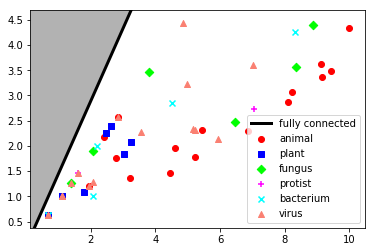

In [241]:
# fig = plt.figure(figsize=(30, 30), dpi=300)
fig = plt.figure()
ax = fig.add_subplot(111)

# ====================================== #

l_x = np.linspace(start=0.5, stop=8, num=10)
m1, c1 = 0.6, 0
l_y = [m1 * i + c1 for i in l_x]
# plt.plot(l_x, l_y)

# ====================================== #

l_x = np.linspace(start=0.5, stop=14, num=10)
m2, c2 = 0.34, 0.2
l_y = [m2 * i + c2 for i in l_x]
# plt.plot(l_x, l_y)

# ====================================== #

colour = np.zeros_like(fractal_dimension, dtype='U16')

kingdom_array = np.array([kingdom[o] for o in organism])

animal_mask = kingdom_array == 'animal'
plant_mask = kingdom_array == 'plant'
fungus_mask = kingdom_array == 'fungus'
protist_mask = kingdom_array == 'protist'
bacterium_mask = kingdom_array == 'bacterium'
virus_mask = kingdom_array == 'virus'


masks = [animal_mask, plant_mask, fungus_mask, protist_mask, bacterium_mask, virus_mask]



colour_options = ['red', 'blue', 'lime', 'magenta', 'cyan', 'salmon']
marker_options = ['o', 's', 'D', '+', 'x', '^']
kingdoms = ['animal', 'plant', 'fungus', 'protist', 'bacterium', 'virus']

masks = [[kingdom_array == kingdom] for kingdom in kingdoms]

for mask, colour_option in zip(masks, colour_options):
    colour[mask] = colour_option

x = np.log(num_nodes)# + np.log(num_edges) 
y = fractal_dimension
        
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# ax.scatter(x, y, c=colour)

# ylim = ax.get_ylim()
# xlim = ax.get_xlim()





split_sets = [[x[mask], y[mask]] for mask in masks]

red_patch = patches.Patch(color='red', label='The red data')

patch_list = [patches.Patch(color=c, label=k) for c, k in zip(colour_options, kingdoms)]

# fig.legend(handles=patch_list, bbox_to_anchor=(0.85, 0.435))

# fig2 = plt.figure(figsize=(10, 10))

# ax = fig2.add_subplot(111)
for i, point_set in enumerate(split_sets):
    x, y = point_set
#     ax = fig2.add_subplot(321 + i, title=kingdoms[i])
    ax.scatter(x, y, marker=marker_options[i], label=kingdoms[i], c=colour_options[i])

    ax.legend()
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
#     ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c=colour_options[i])

ylim = ax.get_ylim()
xlim = ax.get_xlim()

max_fd_x = np.linspace(start=np.exp(0), stop=np.exp(12), num=10)
max_fd_y = np.log2(max_fd_x)

ax.plot(np.log(max_fd_x), max_fd_y, lw=3, c='black', label='fully connected')
ax.legend()

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.fill_between(np.log(max_fd_x), max_fd_y, 100, facecolor='black', alpha=0.3)

plt.show()